In [1]:
#Before you can do this lecture, you'll need to install networkx
#run  'conda install networkx' at the command line 

#this idea comes from http://kieranhealy.org/blog/archives/2013/06/09/using-metadata-to-find-paul-revere/

### Welcome to Boston, 1776

His Majesty, King George III, has asked us to root out the most troublesome of the boston rebels using Ye Old Bigge Data.   We're going to use graph theory to identify the rebel leaders and wow the audience at the next Theadore Talk.  

In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("../data/PaulRevereAppD.csv", index_col='Name')


In [6]:
df.head()

,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
Name,,,,,,,
Adams.John,0,0,1,1,0,0,0
Adams.Samuel,0,0,1,1,0,1,1
Allen.Dr,0,0,1,0,0,0,0
Appleton.Nathaniel,0,0,1,0,0,1,0
Ash.Gilbert,1,0,0,0,0,0,0


In [7]:
df.shape

(254, 7)

In [8]:
people_x_groups = df

In [9]:
df.T

Name,Adams.John,Adams.Samuel,Allen.Dr,Appleton.Nathaniel,Ash.Gilbert,Austin.Benjamin,Austin.Samuel,Avery.John,Baldwin.Cyrus,Ballard.John,...,Whitwell.William,Williams.Jeremiah,Williams.Jonathan,Williams.Thomas,Willis.Nathaniel,Wingfield.William,Winslow.John,Winthrop.John,Wyeth.Joshua,Young.Thomas
StAndrewsLodge,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
LoyalNine,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
NorthCaucus,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
LongRoomClub,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
TeaParty,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,1
BostonCommittee,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
LondonEnemies,0,1,0,0,0,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,0


In [10]:
groups_x_people = df.T

In [12]:
print(people_x_groups.shape)
print(groups_x_people.shape)

(254, 7)
(7, 254)


In [13]:
people_adj =  people_x_groups.dot(groups_x_people)

In [14]:
people_adj.shape

(254, 254)

In [15]:
people_adj.head()

Name,Adams.John,Adams.Samuel,Allen.Dr,Appleton.Nathaniel,Ash.Gilbert,Austin.Benjamin,Austin.Samuel,Avery.John,Baldwin.Cyrus,Ballard.John,...,Whitwell.William,Williams.Jeremiah,Williams.Jonathan,Williams.Thomas,Willis.Nathaniel,Wingfield.William,Winslow.John,Winthrop.John,Wyeth.Joshua,Young.Thomas
Name,,,,,,,,,,,,,,,,,,,,,
Adams.John,2,2,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
Adams.Samuel,2,4,1,2,0,1,1,1,1,1,...,1,0,1,0,0,0,1,2,0,2
Allen.Dr,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
Appleton.Nathaniel,1,2,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2
Ash.Gilbert,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
G = nx.from_numpy_matrix(people_adj.values)
G = nx.relabel_nodes(G, dict(enumerate(people_adj.columns)))

/home/mike/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


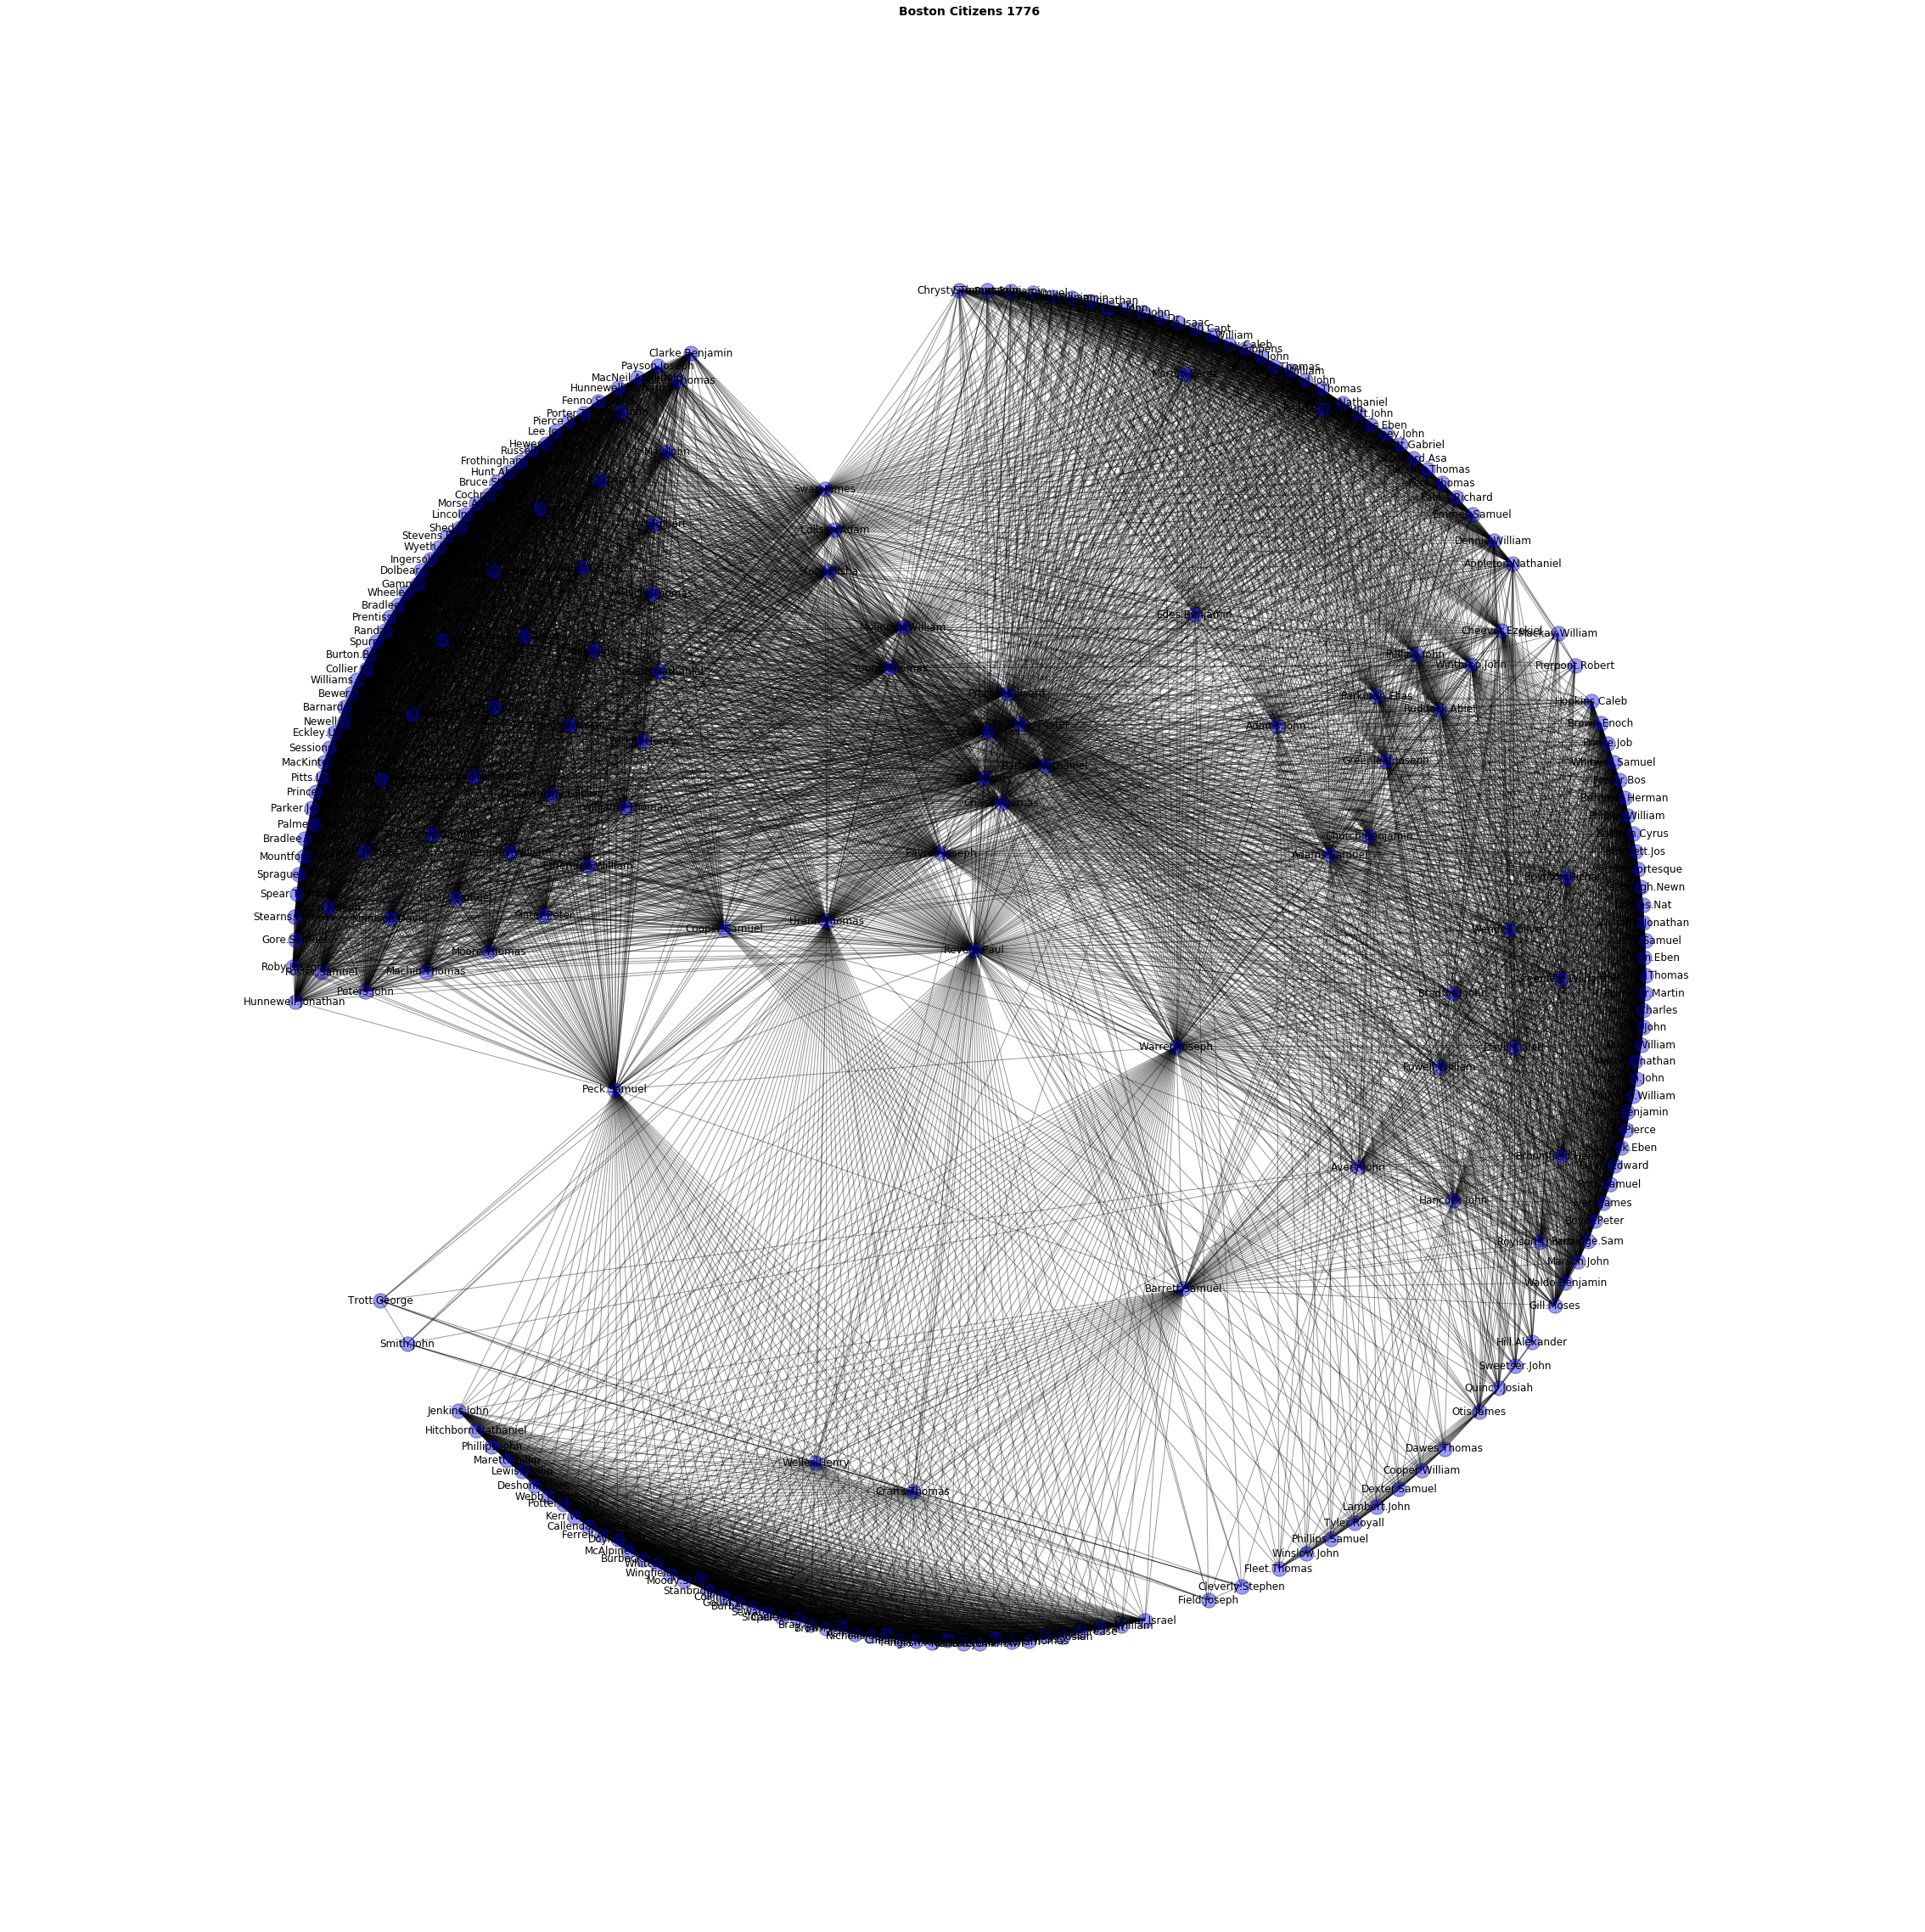

In [17]:

plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 14}
plt.title("Boston Citizens 1776", font)


nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [18]:
centrality=nx.eigenvector_centrality(G)

In [19]:

person_list = []
for node in centrality:
    person_list.append((node,centrality[node]))
    
sorted_person_list = person_list.sort(key=lambda x: x[1])

With so many important rebels, it's hard to know where to start.   Perhaps we should start at the top of the list with Paul Revere.

In [20]:
sorted(person_list, key=lambda x: x[1], reverse=True)

[('Revere.Paul', 0.1660110730137117),
 ('Barber.Nathaniel', 0.16184149972615808),
 ('Bass.Henry', 0.1545708456338813),
 ('Chase.Thomas', 0.1545708456338813),
 ('Proctor.Edward', 0.15057069605491832),
 ('Condy.JamesFoster', 0.15057069605491832),
 ('Grant.Moses', 0.15057069605491832),
 ('Molineux.William', 0.1298548058453146),
 ('Young.Thomas', 0.1298548058453146),
 ('Urann.Thomas', 0.1275612302883679),
 ('Story.Elisha', 0.1185840021740748),
 ('Collson.Adam', 0.1185840021740748),
 ('Swan.James', 0.1185840021740748),
 ('Eayres.Joseph', 0.11402041361770449),
 ('Warren.Joseph', 0.09524815694809083),
 ('Peck.Samuel', 0.09101094785115406),
 ('Cooper.Samuel', 0.08849686858136124),
 ('Adams.Samuel', 0.08627092883379772),
 ('Church.Benjamin', 0.08627092883379772),
 ('Hunnewell.Richard', 0.08203371973686076),
 ('Morse.Anthony', 0.08203371973686076),
 ('Moore.Thomas', 0.08203371973686076),
 ('Russell.William', 0.08203371973686076),
 ('Simpson.Benjamin', 0.08203371973686076),
 ('Sessions.Robert', 0